# Clasificadores

Esta notebook contiene la definición, entrenamiento y evaluación de una serie de clasificadores cuyo objetivo es predecir cuales de los *usuarios trials* se van a convertir en *payments*.

Básicamente, se tiene un dataset con dos clases: una **positiva** (*usuarios trials* que se convirtieron en *payments*) y una **negativa** (*usuarios trials* que **no** se convirtieron en *payments*).

Una vez entrenados los modelos, éstos se evaluan a la luz de una serie de métricas con el fin de poder determinar cuál de ellos posee un mejor desempeño para realizar la tarea.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

## Lectura de datos

In [2]:
#Funcion para decidir que dataset se va a utilizar
def get_configuracion(balanceado):
    
    if balanceado:
        return {
            'path': 'dataset_balanceado.csv',
            'class_weight' : None,
            'tipo' : 'balanceado'
        }
    else:
        return{
            'path': 'dataset_desbalanceado.csv',
            'class_weight' : 'balanced',
            'tipo' : 'desbalanceado'
        }
    

Se trabaja con dos tipos de dataset con el fin de observar cómo impactan en el entrenamiento de los modelos. Uno de ellos está **balanceado** y el otro **desbalanceado**

In [3]:
configuracion_desbalanceada = get_configuracion(False)
configuracion_balanceada = get_configuracion(True)

In [4]:
df_data_balanceada = pd.read_csv(configuracion_balanceada['path'])
df_data_desbalanceada = pd.read_csv(configuracion_desbalanceada['path'])

Se chequea que se hayan cargado los datos

In [5]:
df_data_balanceada.head()

,admin_visits,intercom_conversations,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,country_AR,country_BR,...,source_pulido_none,source_pulido_partners,creation_weekday_0,creation_weekday_1,creation_weekday_2,creation_weekday_3,creation_weekday_4,creation_weekday_5,creation_weekday_6,target
0,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001096,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.045455,0.0,0.000000,0.000000,0.0,0.000000,0.001576,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.045455,0.0,0.000035,0.000035,0.0,0.000000,0.001713,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0.045455,0.0,0.000035,0.000035,0.0,0.000000,0.004522,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.045455,0.0,0.000000,0.000000,0.0,0.002345,0.000000,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0


## Dataset entrenamiento y test

A continuación se define una función que divide el dataset en dos: uno para entrenamiento del modelo y otro para la evaluación del mismo

In [6]:
def get_train_test_dataset(df_data):
    y = df_data['target']
    X = df_data.drop(columns=['target'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
    return X_train, X_test, y_train, y_test

## Entrenamiento del modelo

A continuación se entrenan una serie de algoritmos de clasificación. Se tomaron alguno de los alogritmos clásicos en la literatura, tales como *Nearest Neighbors* y *RBF SVM*; y otros que, si bien hoy en día son clásicos, se los puede catalogar dentro de los algoritmos de clasificación que se encuentran más cercano al estado del arte, tales como  *Random Forest*, *Neural Net*, *AdaBoost*.

Los primeros sirven como *baseline* y el objetivo de los otros es superar el rendimiento de los primeros.

Dado que se tiene dos tipos de dataset, se entranarán todos los modelos con ambos con el fin de observar el impacto que produce el desbalance sobre ellos.

In [7]:
def get_clasificadores(configuracion):

    names = ['Nearest Neighbors', 'RBF SVM', 'Random Forest', 'Neural Net', 'AdaBoost']

    classifiers = [
        KNeighborsClassifier(3),
        SVC(gamma=2, C=1, class_weight=configuracion['class_weight']),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, class_weight=configuracion['class_weight']),
        MLPClassifier(max_iter=1000),
        AdaBoostClassifier()
    ]
    
    return names, classifiers

### Dataset balanceado

Se definen los dataset de *entrenamiento* y *test* así como los modelos para trabajar con el dataset balanceado

In [8]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = get_train_test_dataset(df_data_balanceada)
names_bal, classifiers_bal =get_clasificadores(configuracion_balanceada)

Se entrenan los modelos

In [9]:
#Entrenamiento de los modelos
for name, clf in zip(names_bal, classifiers_bal):
    clf.fit(X_train_bal, y_train_bal)

### Dataset desbalanceado

Se define los dataset de *entrenamiento* y *test* así como los modelos para trabajar con el dataset desbalanceado. En este caso, a los modelos *SVC* y *Random Forest* se les *setea* la propiedad **class_weight** con el fin de que presten más atención a la clase con menor cantidad de instancias

In [10]:
X_train_des, X_test_des, y_train_des, y_test_des = get_train_test_dataset(df_data_desbalanceada)
names_des, classifiers_des =get_clasificadores(configuracion_desbalanceada)

Se entrenan los modelos

In [11]:
#Entrenamiento de los modelos
for name, clf in zip(names_des, classifiers_des):
    clf.fit(X_train_des, y_train_des)

### Evaluación de los modelos

Dado que se esta trabajando sobre un dataset desbalanceado, para la evaluación de los modelos se analizan las siguientes métricas que son las más utilizadas en la literatura para estos escenarios:

* **Curva ROC** que muestra la razón o proporción de *verdaderos positivos* (VPR = Razón de Verdaderos Positivos) frente a la razón o proporción de *falsos positivos* (FPR = Razón de Falsos Positivos).
* **Curva de Precision-recall** que muetra la relación que existe entre las métricas *precision* y *recall* para diferentes umbrales. La *precisión* se define como a la fracción de instancias recuperadas que son relevantes; mientras que el *recall* es la fracción de instancias relevantes que han sido recuperadas.

In [12]:
def get_plots(names, classifiers, axs, X_test, y_test, tipo_dataset ):
    
    for name, clf in zip(names, classifiers):

        plot_roc_curve(clf, X_test, y_test, ax=axs[0], name=name)
        plot_precision_recall_curve(clf, X_test, y_test, ax=axs[1], name=name)
        
    axs[0].set_title('Curva ROC - ' + tipo_dataset)
    axs[1].set_title('Curva de precision-recall - ' + tipo_dataset)


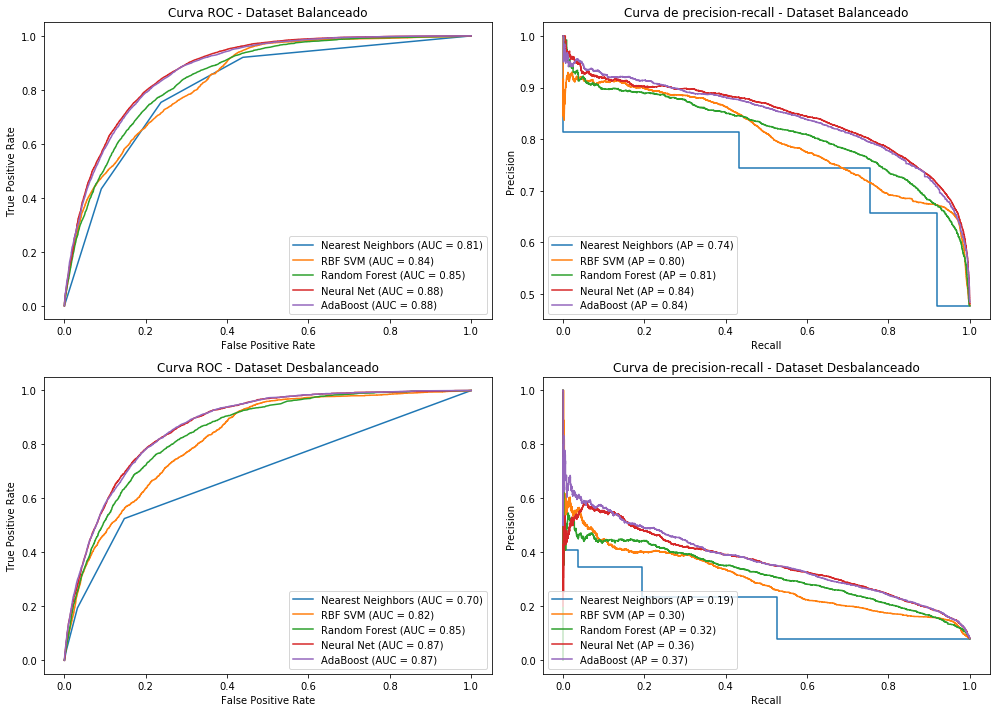

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt

# Defino los graficos a mostrar
fig, [ax_bal, ax_des] = plt.subplots(2, 2, figsize=(14, 10))
#Calculo la curva para los modelos entrenados con el dataset balanceado
get_plots(names_bal, classifiers_bal, ax_bal, X_test_bal, y_test_bal, 'Dataset Balanceado')
#Calculo la curva para los modelos entrenados con el dataset desbalanceado
get_plots(names_des, classifiers_des, ax_des, X_test_des, y_test_des, 'Dataset Desbalanceado')

fig.tight_layout()

plt.show() 

En base a los resultados reportados es posible derivar las siguientes conclusiones:

* Si uno se centra en la **curva ROC** observará que los modelos parecerían no estar influenciados por dicho desbalance (de hecho, muestran un rendimiento prácticamente análogo). Esto se debe a que en la **curva ROC** no hace énfasis sobre la clase postiva, que es la menos representada en el dataset y, a su vez, la que nos interesa detectar. Por eso hay que poner el foco sobre la **curva de precision-recall**. Allí se observará que los modelos entrenados con el dataset **desbalanceado** tienen un desempeño pobre a la hora de distinguir una clase de la otra (principalmente a la hora de detectar la clase positiva); mientras que los mismos modelos entrenados con un dataset **balanceado** ofrecen un aceptable rendimiento (por encima del 75%).

* Si se pone el foco sobre el desempeño de los modelos, se observará que, dejando de lado el modelo de *Nearest Neighbors* que se queda un poco rezagado, el resto posee un rendimiento similar. Por ejemplo, si se vuelve sobre la **curva de precision-recall** (que es la que nos interesa), se verá que la **precisión promedio (AP)** oscila entre el 81% y el 85%. Es decir, que utilizando un modelo complejo (tal como *Neural Net* o *AdaBoost*) apenas se logra una mejora del 4% sobre un modelo clásico como es *RBF SVM*. 

Por supuesto que los modelos aún se puede mejorar su rendimiento haciendo un trabajo de optimización de los hiperparámetros. Sin embargo, esta evaluación muestra una tendencia de su comportamiento y ofrece información para seleccionar uno (que luego puede ser mejorado optimizando los hiperparámetros). Teniendo en cuenta que el problema aquí planteado busca obtener *insights* del modelo que puedan ser de utilidad para el negocio, se opta por un clasificador basado en *AdaBoost* y entrenado con un dataset **balanceado**. *AdaBoost*, una vez entrenado, permite ver de forma sencilla que prioridad le asigna a los *features* para poder tomar decisiones. Mientras que en un modelo de *Neural Network* (que es el otro modelo que obtuvo mejores resultados), obtener dicha información sobre los *features* es más complejo porque requiere analizar el comportamiento interno de la red y sus conexiones (tarea que puede derivar en un dolor de cabeza).

In [14]:
from sklearn.metrics import classification_report

def get_reporte_clasificador(clf, X_test, y_test, df_resultados, dataset_utilizado, name):
    
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=['no payment', 'payment'], output_dict=True)

    df_resultados = df_resultados.append({'clasificador' : name,
                                 'dataset_utilizado': dataset_utilizado,
                                 'precision_no_payment':report['no payment']['precision'],
                                 'recall_no_payment':report['no payment']['recall'],
                                 'f1-score_no_payment':report['no payment']['f1-score'],
                                 'precision_payment':report['payment']['precision'],
                                 'recall_payment':report['payment']['recall'],
                                 'f1-score_payment':report['payment']['f1-score']}, 
                       ignore_index=True)
    
    return df_resultados


In [15]:

#Defino un dataframe donde guardar los resultados
df_resultados = pd.DataFrame({'clasificador' : [],
                             'dataset_utilizado': [],
                             'precision_no_payment':[],
                             'recall_no_payment':[],
                             'f1-score_no_payment':[],
                             'precision_payment':[],
                             'recall_payment':[],
                             'f1-score_payment':[]})

#Obtenemos los resultados para los modelos entrenados con el dataset desbalanceado
for name, clf in zip(names_des, classifiers_des):
    df_resultados = get_reporte_clasificador(clf, X_test_des, y_test_des, df_resultados, 'desbalanceado', name)
    
#Obtenemos los resultados para los modelos entrenados con el dataset desbalanceado
for name, clf in zip(names_bal, classifiers_bal):
    df_resultados = get_reporte_clasificador(clf, X_test_bal, y_test_bal, df_resultados, 'balanceado', name)

In [16]:
df_resultados

,clasificador,dataset_utilizado,f1-score_no_payment,f1-score_payment,precision_no_payment,precision_payment,recall_no_payment,recall_payment
0,Nearest Neighbors,desbalanceado,0.950034,0.248115,0.932715,0.344325,0.968008,0.193929
1,RBF SVM,desbalanceado,0.781569,0.282822,0.977651,0.170527,0.651001,0.828214
2,Random Forest,desbalanceado,0.881649,0.362810,0.970132,0.243326,0.807958,0.712857
3,Neural Net,desbalanceado,0.958907,0.208309,0.929212,0.542042,0.990563,0.128929
4,AdaBoost,desbalanceado,0.958042,0.250336,0.931750,0.504875,0.985861,0.166429
5,Nearest Neighbors,balanceado,0.767284,0.748662,0.772068,0.743685,0.762559,0.753705
6,RBF SVM,balanceado,0.725993,0.748335,0.798926,0.690445,0.665262,0.816822
7,Random Forest,balanceado,0.782115,0.732193,0.743114,0.782682,0.825436,0.687824
8,Neural Net,balanceado,0.802905,0.794381,0.822015,0.775571,0.784663,0.814127
9,AdaBoost,balanceado,0.803532,0.784077,0.801794,0.785948,0.805276,0.782214
